# Reconnaissance de chiffres manuscrits (MNIST) : réseaux convolutionnels

In [1]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.manifold import TSNE


In [2]:
from keras.datasets import mnist

from keras.models import Sequential, load_model

from keras.layers import Dense, Dropout, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils.np_utils import to_categorical

# Permet d'éviter les erreurs mémoires pour le GPU
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

Using TensorFlow backend.


In [3]:
# Importation des données CIFAR10

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [7]:
# Redimensionnement des images [echantillon][canaux][largeur][hauteur]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalisation entre 0 et 1
X_train = X_train / 255
X_test = X_test / 255

# Encodage des sorties en catégories
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

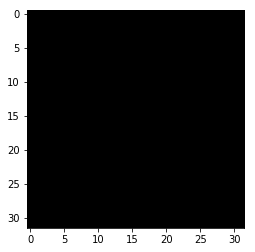

In [8]:
plt.imshow(X_test[1])

In [9]:
# Réseau convolutionnel simple
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
# Pour Theano :
# model.add(Convolution2D(32, 5, 5, input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Impression du modèle
print(model.summary())

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290   

In [10]:
# Apprentissage
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 102s 2ms/step - loss: 2.1338 - acc: 0.2210 - val_loss: 2.0047 - val_acc: 0.2719
Epoch 2/10
50000/50000 [==============================] - 129s 3ms/step - loss: 1.9624 - acc: 0.2986 - val_loss: 1.9108 - val_acc: 0.3230
Epoch 3/10
50000/50000 [==============================] - 128s 3ms/step - loss: 1.8939 - acc: 0.3275 - val_loss: 1.8556 - val_acc: 0.3435
Epoch 4/10
50000/50000 [==============================] - 144s 3ms/step - loss: 1.8459 - acc: 0.3459 - val_loss: 1.8183 - val_acc: 0.3594
Epoch 5/10
50000/50000 [==============================] - 155s 3ms/step - loss: 1.7983 - acc: 0.3645 - val_loss: 1.7654 - val_acc: 0.3722
Epoch 6/10
50000/50000 [==============================] - 141s 3ms/step - loss: 1.7555 - acc: 0.3771 - val_loss: 1.7175 - val_acc: 0.3914
Epoch 7/10
50000/50000 [==============================] - 134s 3ms/step - loss: 1.7169 - acc: 0.3925 - val_loss: 1.6786 - 

In [57]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 64.80%


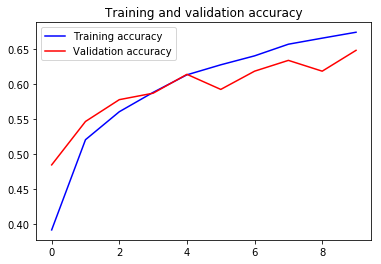

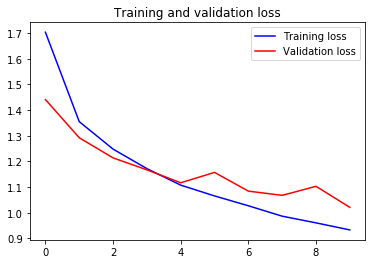

In [58]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
# Prediction
y_cnn = model.predict(X_test)

In [18]:
cifar_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

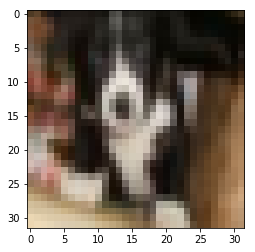

[1.0568863e-05 1.9913425e-07 3.0319372e-01 2.2583419e-01 7.0114248e-07
 4.2690900e-01 2.3113123e-06 4.1542690e-02 2.4017979e-07 2.5063269e-03]
5
dog


In [20]:
import matplotlib.pyplot as plt
import random

ir = random.randint(1, X_test.shape[0])

plt.imshow(X_test[ir])

# Affichage
plt.show()
print(y_cnn[ir])
print(y_cnn[ir].argmax(axis=-1))
print(cifar_classes[y_cnn[ir].argmax(axis=-1)])


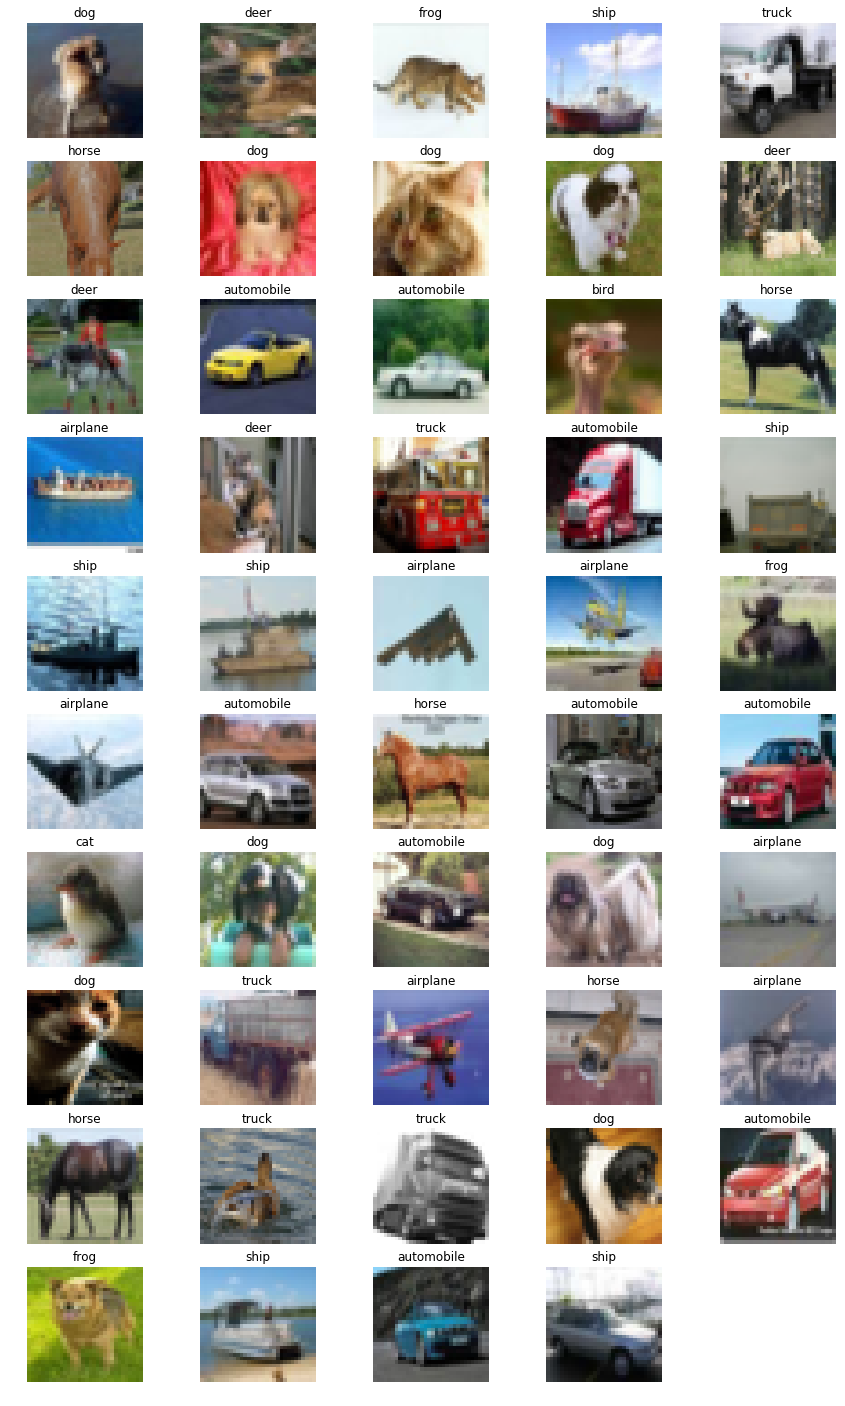

In [21]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
for i in range(1,50) :
    ir = random.randint(0,n_test)
    plt.subplot(10,5,i)
    plt.axis('off')
    plt.imshow(X_test[ir])
    pred_classe = y_cnn[ir].argmax(axis=-1)
    plt.title('%s' % cifar_classes[pred_classe])

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [28]:
# Modèle CNN plus profond
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 84us/step - loss: 1.9287 - acc: 0.2929 - val_loss: 1.6802 - val_acc: 0.3888
Epoch 2/30
50000/50000 [==============================] - 4s 71us/step - loss: 1.6167 - acc: 0.4077 - val_loss: 1.5500 - val_acc: 0.4399
Epoch 3/30
50000/50000 [==============================] - 4s 72us/step - loss: 1.5201 - acc: 0.4428 - val_loss: 1.4909 - val_acc: 0.4635
Epoch 4/30
50000/50000 [==============================] - 4s 71us/step - loss: 1.4671 - acc: 0.4693 - val_loss: 1.4451 - val_acc: 0.4777
Epoch 5/30
50000/50000 [==============================] - 4s 71us/step - loss: 1.4218 - acc: 0.4862 - val_loss: 1.4080 - val_acc: 0.4931
Epoch 6/30
50000/50000 [==============================] - 4s 71us/step - loss: 1.3885 - acc: 0.5018 - val_loss: 1.3774 - val_acc: 0.5090
Epoch 7/30
50000/50000 [==============================] - 4s 71us/step - loss: 1.3652 - acc: 0.5101 - val_loss: 1.4331 - val_acc

In [30]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 61.92%


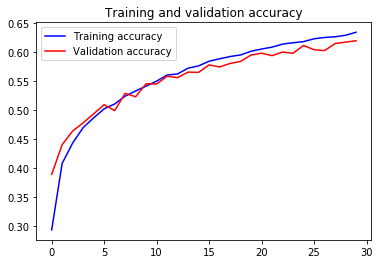

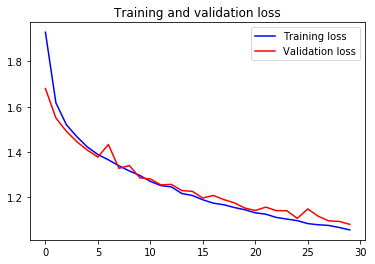

In [31]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
# Prediction
y_cnn = model.predict(X_test)

[[833  14  67  19  10   8   5  12  40  15]
 [  9 887   4   6   1   6   1   4  23  50]
 [ 19   2 629  43  32  26  17  24   7   4]
 [ 14   2  42 567  31 123  35  25   8   5]
 [ 17   4  76  68 814  47  28  38   5   1]
 [  4   1  66 159  23 720  18  43   2   1]
 [  7   3  69  71  33  18 883   7   4   6]
 [ 10   1  18  25  44  43   5 830   2   3]
 [ 51  19  14  18   9   1   2   1 886  21]
 [ 36  67  15  24   3   8   6  16  23 894]]


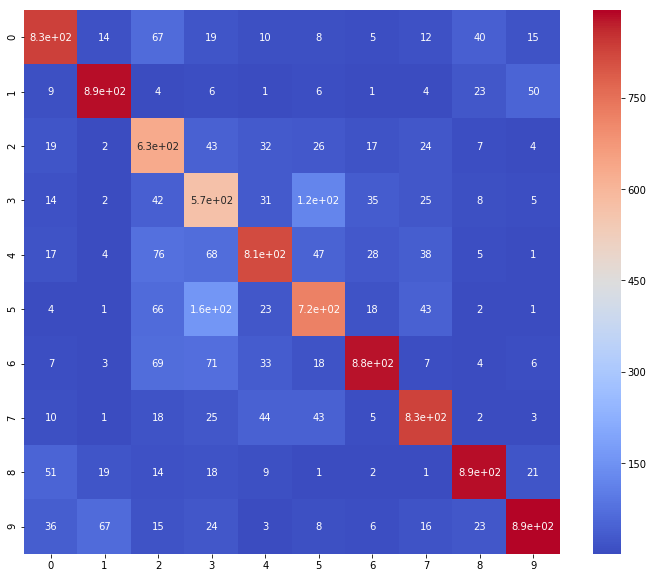

In [51]:
cm = confusion_matrix(y_cnn.argmax(axis=-1),y_test.argmax(axis=-1))
print(cm)
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [1]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
for i in range(1,50) :
    ir = random.randint(0,n_test)
    plt.subplot(10,5,i)
    plt.axis('off')
    plt.imshow(X_test[ir])
    pred_classe = y_cnn[ir].argmax(axis=-1)
    plt.title('%s' % cifar_classes[pred_classe])

NameError: name 'plt' is not defined

In [32]:
# Modèle CNN plus profond
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(64, (3, 3), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 138us/step - loss: 1.7224 - acc: 0.3675 - val_loss: 1.3542 - val_acc: 0.5046
Epoch 2/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.3076 - acc: 0.5297 - val_loss: 1.1418 - val_acc: 0.6004
Epoch 3/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.1244 - acc: 0.6012 - val_loss: 0.9887 - val_acc: 0.6500
Epoch 4/30
50000/50000 [==============================] - 6s 115us/step - loss: 1.0071 - acc: 0.6429 - val_loss: 0.9209 - val_acc: 0.6771
Epoch 5/30
50000/50000 [==============================] - 6s 114us/step - loss: 0.9220 - acc: 0.6732 - val_loss: 0.8467 - val_acc: 0.7077
Epoch 6/30
50000/50000 [==============================] - 6s 114us/step - loss: 0.8611 - acc: 0.6946 - val_loss: 0.8341 - val_acc: 0.7075
Epoch 7/30
50000/50000 [==============================] - 6s 115us/step - loss: 0.8106 - acc: 0.7161 - val_loss: 0.7666 - 

In [34]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 79.43%


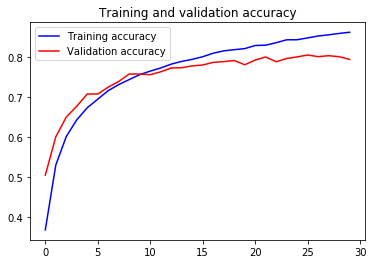

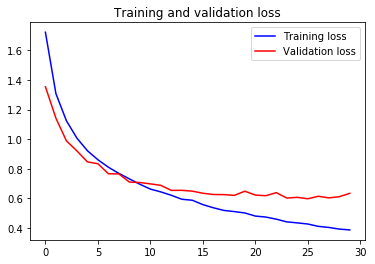

In [35]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

# Exercice  
Appliquer les approches MLP et CNN sur le dataset *Fashion_MNIST* :  
https://keras.io/datasets/